# Machine Learning Exercise 4-1
## Question 1 : Image Posterization with K-means
By Gholamreza Dar

https://gholamrezadar.ir/

Feb 2022


Questions available at : [Github Link](https://github.com/Gholamrezadar/machine-learning-exercises/blob/main/ML_HW04.pdf)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style("dark")
from PIL import Image
from skimage import io, color

## Functions



In [ ]:
class GHDKmeans():
  def __init__(self, k, tol, max_iter):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter
    self.X = None
    self.y_pred = None
    self.centers = None
    self.C = None

  def fit(self, X, centers):
    """X: (m,n) input matrix"""
    self.X = X
    self.centers = centers
    # Do KMeans
    for i in range(self.max_iter):
      # Find the distance between each point and each center
      distances = []
      for idx, center in enumerate(self.centers):
        distances.append(np.linalg.norm(X-center, axis=1))
      nearest_cluster = np.argmin(distances, axis=0)

      # Assign points to clusters
      self.y_pred = nearest_cluster

      # Re-calculate centers
      new_centers = np.zeros_like(centers)
      for idx, center in enumerate(self.centers):
        new_centers[idx] = X[self.y_pred == idx].mean(axis=0)

      # print(i, self.sse())
      
      # Tolerance check
      if np.sum(np.abs((new_centers-self.centers)))<self.tol:
        print(f"Tolerance reached on iteration {i} ,{np.sum(np.abs((new_centers-self.centers)/self.centers*100))}")
        break

      self.centers = new_centers
      # print(self.centers)

  def accuracy(self, y):
    return max((y==self.y_pred).sum()/len(y), 1.0-(y==self.y_pred).sum()/len(y))
    
  def predict(self):
    # Return the Clustering result y_pred
    return self.y_pred
  
  def sse(self):
    sse = 0
    for idx, center in enumerate(self.centers):
      # Only points that are currently in center's cluster
      X_center = self.X[self.y_pred==idx]
      # Calculate sse for each cluster
      squared_error = np.power(X_center - center.reshape(1,-1), 2)
      # Add sse of clusters together
      sse += squared_error.sum()
    return sse

In [ ]:
def show_palette(centers, k):
  """Displays the centers as a color palette in kmeans"""
  fig, axs = plt.subplots(1, k, figsize=(k,1), constrained_layout=True)
  for idx, center in enumerate(centers):
    color = np.round(np.ones((16,16,3), dtype='int')*center.astype('int'))
    ax = axs[idx]
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(color)
  plt.show()

In [ ]:
def posterize_image(image, k, display=True, is_lab=False):
  """Does kmeans clustering on the image and uses kmeans centeroids to approximate each pixels color

  Parameters
  ----------
  image: 3d rgb image
    input image

  k: int
    number of clusters(colors)

  display: bool
    whether to display the images or to use the function to get the posterized_image
  
  Returns
  -------
  posterized_image: 3d rgb image
    posterized version of 'image'
  """
  # Transform 3d image into a 2d array (m,n,c) -> (m*n,c)
  image = image.copy()
  X = image.reshape(image.shape[0]*image.shape[1], -1)

  # Randomly select k points as centeroids
  np.random.seed(2)
  centers = np.zeros((k, X.shape[1]))
  for i in range(k):
    centers[i] = X[np.random.randint(0, len(X))]

  # K-means Clustering
  kmeans = GHDKmeans(k=k, tol=0.0001, max_iter=150)
  kmeans.fit(X, centers)

  # Image posterization
  pred = kmeans.predict()
  for idx, center in enumerate(kmeans.centers):
    X[pred==idx] = center

  posterized_image = X.reshape(image.shape)

  if is_lab:
    posterized_image = color.lab2rgb(posterized_image)
    # posterized_image = posterized_image

  if display:
    # Display the Posterized image
    plt.title(f"K={k}")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(posterized_image)
    plt.show()

    # Display the color palette
    show_palette(kmeans.centers, k)

  return posterized_image.copy()

In [ ]:
def display_image_at_different_k_values(img_array, title=""):
  """Displays a 2x4 image that shows the image in 8 different levels of posterization
  Parameters
  ----------
  img_array: list of 8 images
    images returned by the posterization function at different k values
  """
  k_values = [2,3,4,5,6,10,15,20]
  fig, axs = plt.subplots(2, 4, figsize=(8,5), constrained_layout=True)
  fig.dpi=120
  fig.suptitle(title)
  for k, image, ax in zip(k_values, img_array, np.ravel(axs)):
    ax.set_title(f"{k} colors")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image)

## Load data

In [ ]:
!wget -nc https://raw.githubusercontent.com/Gholamrezadar/machine-learning-exercises/main/ML_HW04.zip

--2022-02-20 13:31:28--  https://raw.githubusercontent.com/Gholamrezadar/machine-learning-exercises/main/ML_HW04.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475427 (1.4M) [application/zip]
Saving to: ‘ML_HW04.zip’

ML_HW04.zip         100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2022-02-20 13:31:28 (25.5 MB/s) - ‘ML_HW04.zip’ saved [1475427/1475427]



In [ ]:
!unzip -n "/content/ML_HW04.zip" -d "/content/ML_HW04/"

Archive:  /content/ML_HW04.zip
   creating: /content/ML_HW04/ML_HW04/
   creating: /content/ML_HW04/ML_HW04/data/
   creating: /content/ML_HW04/ML_HW04/data/2/
  inflating: /content/ML_HW04/ML_HW04/data/2/bird.jpg  
  inflating: /content/ML_HW04/ML_HW04/data/2/car.JPG  
  inflating: /content/ML_HW04/ML_HW04/data/2/holi-festival.jpg  
   creating: /content/ML_HW04/ML_HW04/data/3/
  inflating: /content/ML_HW04/ML_HW04/data/3/Compound.txt  
  inflating: /content/ML_HW04/ML_HW04/data/3/D31.txt  
  inflating: /content/ML_HW04/ML_HW04/data/3/pathbased.txt  
  inflating: /content/ML_HW04/ML_HW04/data/3/rings.txt  
  inflating: /content/ML_HW04/ML_HW04/data/3/spiral.txt  
  inflating: /content/ML_HW04/ML_HW04/ML_HW04.pdf  


In [ ]:
bird_rgb = io.imread("/content/ML_HW04/ML_HW04/data/2/bird.jpg")
bird_lab = color.rgb2lab(bird_rgb)

car_rgb = io.imread("/content/ML_HW04/ML_HW04/data/2/car.JPG")
car_lab = color.rgb2lab(car_rgb)

holi_rgb = io.imread("/content/ML_HW04/ML_HW04/data/2/holi-festival.jpg")
holi_lab = color.rgb2lab(holi_rgb)

##A) K-means clustering
with k={2,3,4,5,6,10,15,20}

Tolerance reached on iteration 15 ,0.0


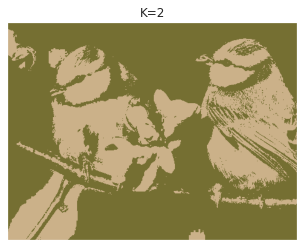

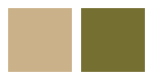


Tolerance reached on iteration 46 ,0.0


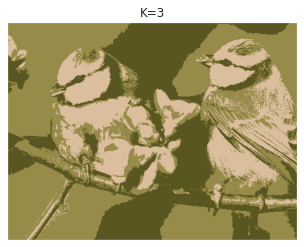

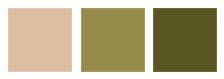


Tolerance reached on iteration 41 ,0.0


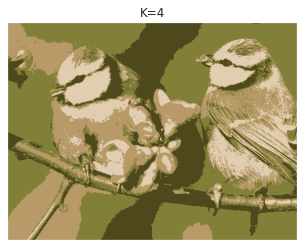

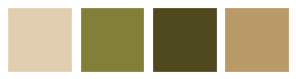


Tolerance reached on iteration 55 ,0.0


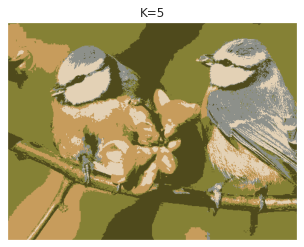

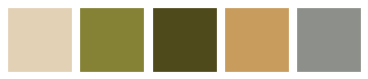


Tolerance reached on iteration 49 ,0.0


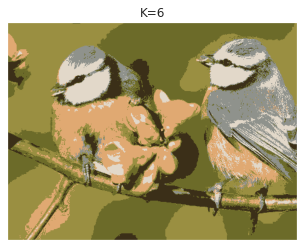

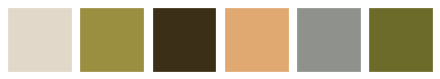


Tolerance reached on iteration 46 ,0.0


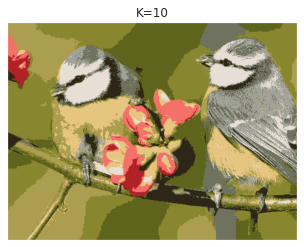

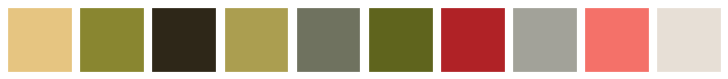


Tolerance reached on iteration 107 ,0.0


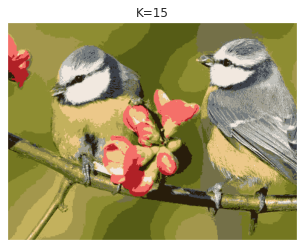

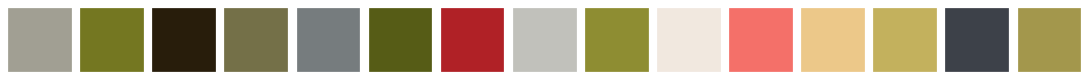


Tolerance reached on iteration 101 ,0.0


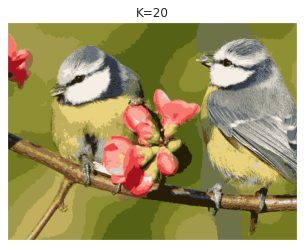

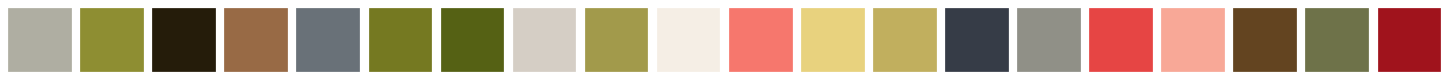


Tolerance reached on iteration 13 ,0.0


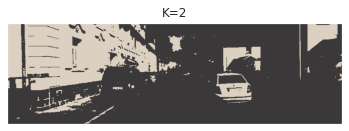

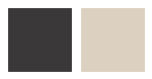


Tolerance reached on iteration 14 ,0.0


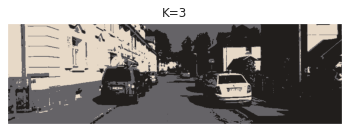

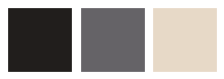


Tolerance reached on iteration 41 ,0.0


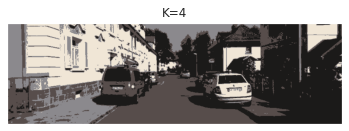

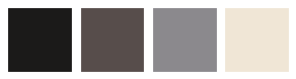


Tolerance reached on iteration 43 ,0.0


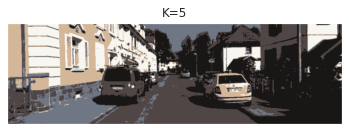

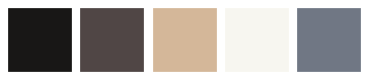


Tolerance reached on iteration 25 ,0.0


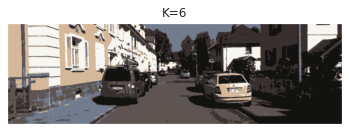

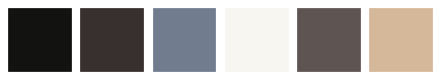


Tolerance reached on iteration 37 ,0.0


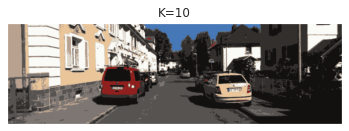

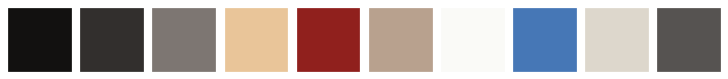


Tolerance reached on iteration 114 ,0.0


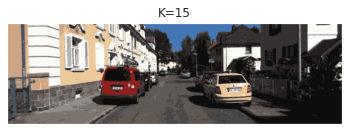

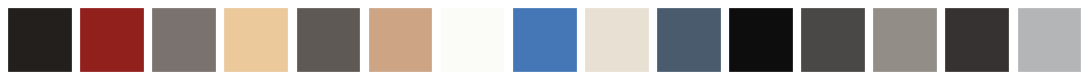


Tolerance reached on iteration 120 ,0.0


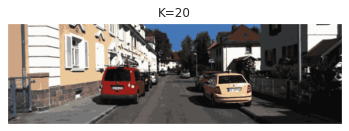

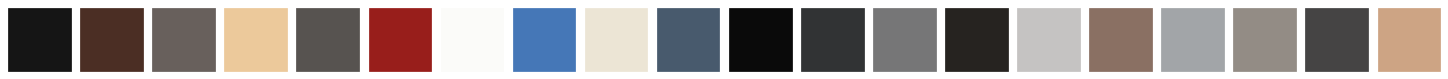


Tolerance reached on iteration 26 ,0.0


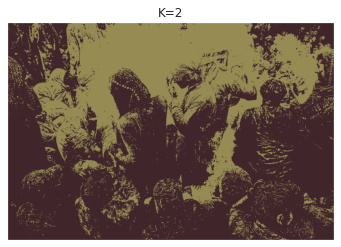

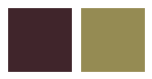


Tolerance reached on iteration 28 ,0.0


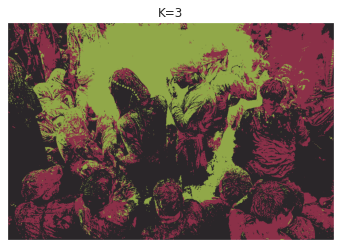

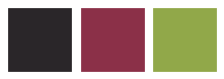


Tolerance reached on iteration 47 ,0.0


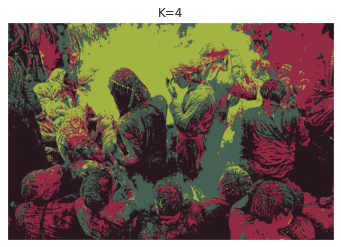

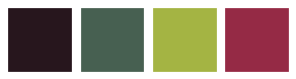


Tolerance reached on iteration 34 ,0.0


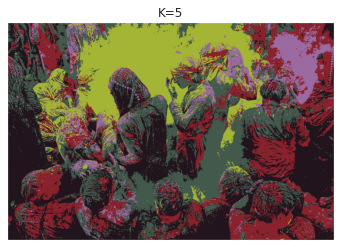

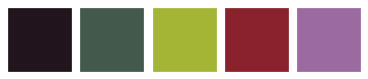


Tolerance reached on iteration 68 ,0.0


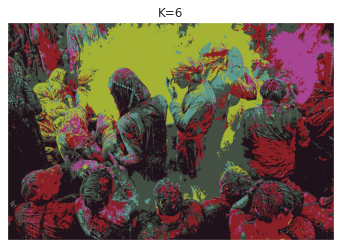

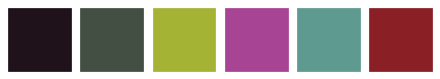


Tolerance reached on iteration 102 ,0.0


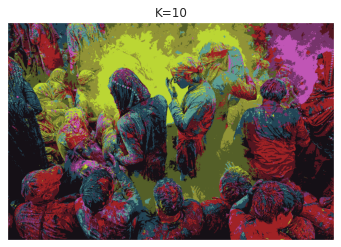

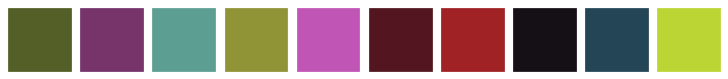


Tolerance reached on iteration 127 ,0.0


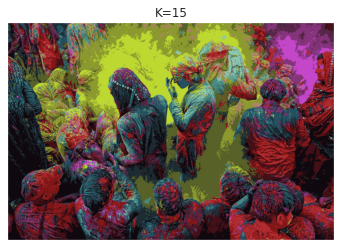

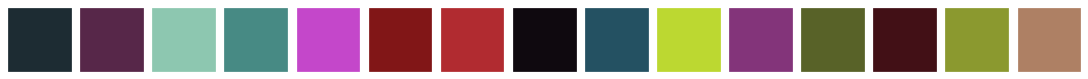

In [ ]:
posterized_bird_images = []
posterized_car_images = []
posterized_holi_images = []

# Bird
for k in [2,3,4,5,6,10,15,20]:
  posterized_bird = posterize_image(bird_rgb, k=k)
  posterized_bird_images.append(posterized_bird)
  print()

# Car
for k in [2,3,4,5,6,10,15,20]:
  posterized_car = posterize_image(car_rgb, k=k)
  posterized_car_images.append(posterized_car)
  print()

# Holi
for k in [2,3,4,5,6,10,15,20]:
  posterized_holi = posterize_image(holi_rgb, k=k)
  posterized_holi_images.append(posterized_holi)
  print()

##B)Show Images

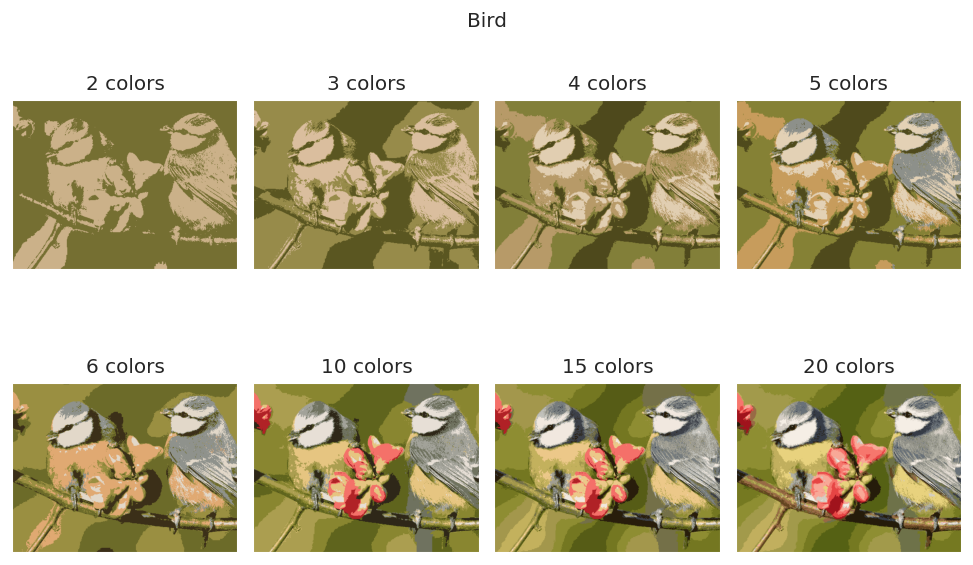

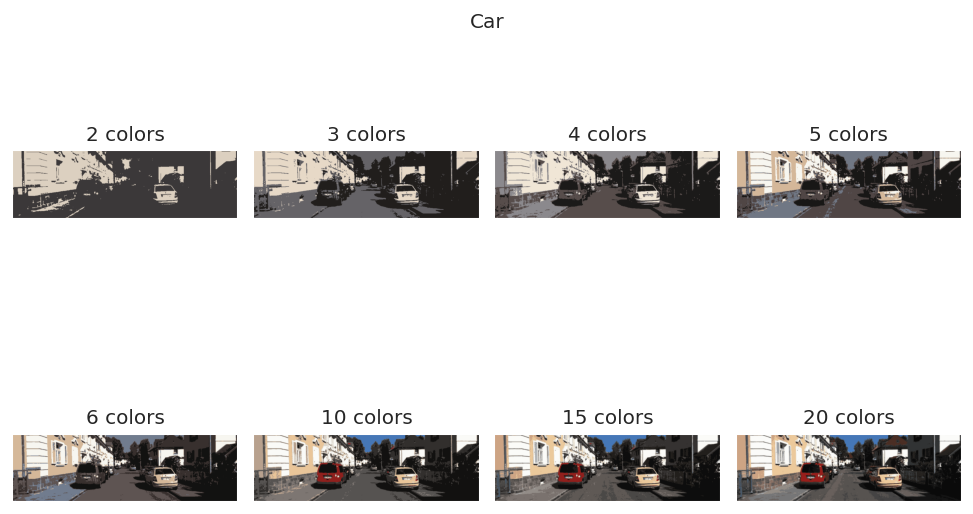

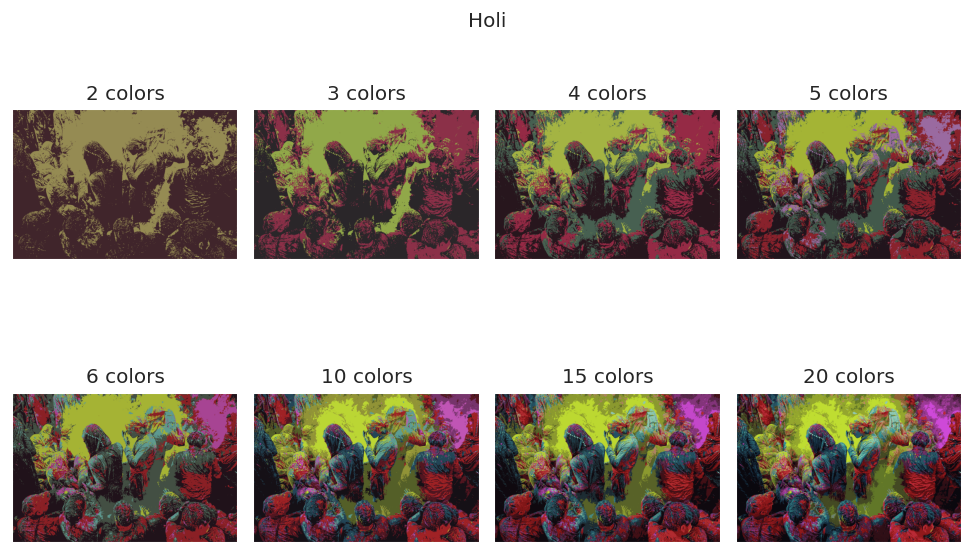

In [ ]:
display_image_at_different_k_values(posterized_bird_images, title="Bird")
display_image_at_different_k_values(posterized_car_images, title="Car")
display_image_at_different_k_values(posterized_holi_images, title="Holi")

## Appendix: lab Color-space
running the code but with lab color space instead of rgb color space which is more accurate when calculating the distance between colors.

In [ ]:
posterized_bird_images_lab = []
posterized_car_images_lab = []
posterized_holi_images_lab = []

# Bird
for k in [2,3,4,5,6,10,15,20]:
  posterized_bird = posterize_image(bird_lab, k=k, is_lab=True)
  posterized_bird_images_lab.append(posterized_bird)
  print()

# Car
for k in [2,3,4,5,6,10,15,20]:
  posterized_car = posterize_image(car_lab, k=k, is_lab=True)
  posterized_car_images_lab.append(posterized_car)
  print()

# Holi
for k in [2,3,4,5,6,10,15,20]:
  posterized_holi = posterize_image(holi_lab, k=k, is_lab=True)
  posterized_holi_images_lab.append(posterized_holi)
  print()

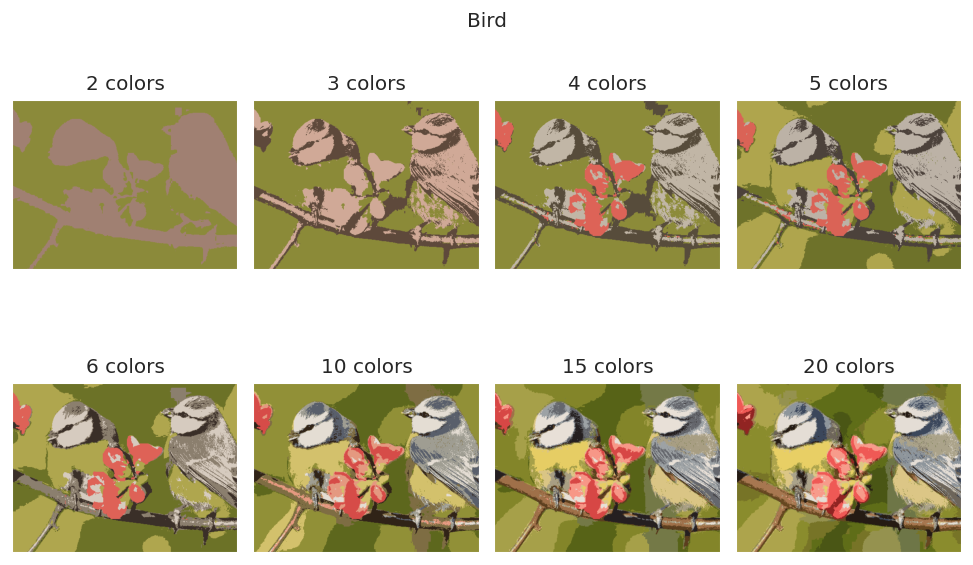

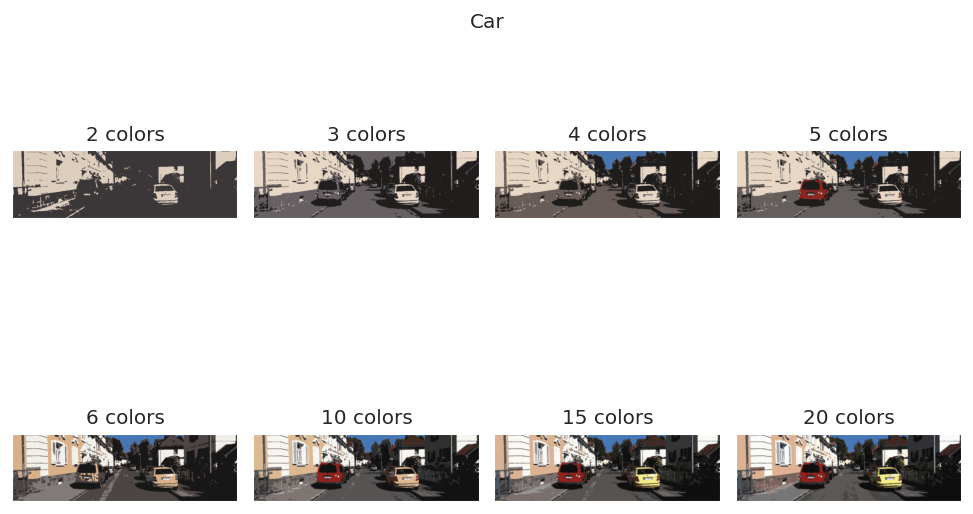

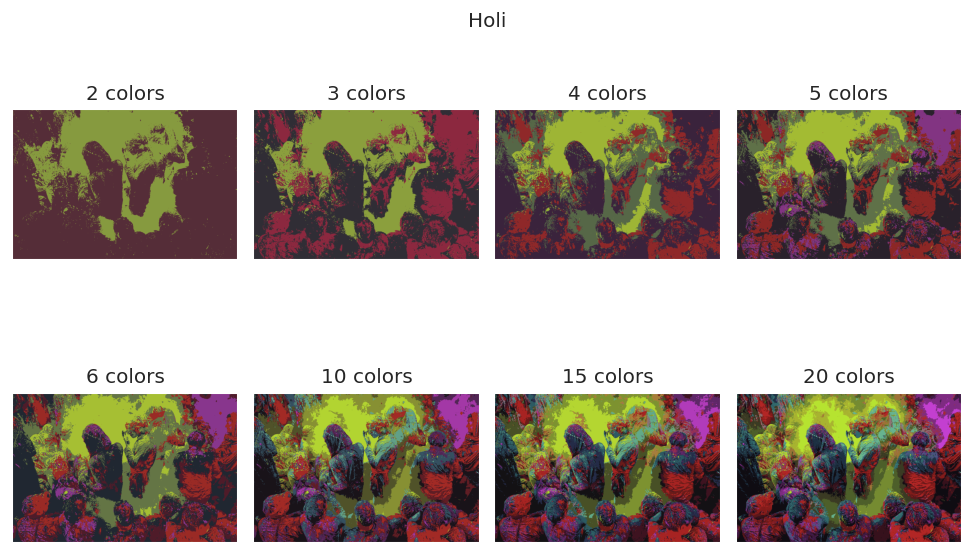

In [ ]:
display_image_at_different_k_values(posterized_bird_images_lab, title="Bird")
display_image_at_different_k_values(posterized_car_images_lab, title="Car")
display_image_at_different_k_values(posterized_holi_images_lab, title="Holi")